# Lead Scoring Case Study

This case study is intended to increase the lead conversion rate for an online learning company.

#Data Import and cleanup

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lead_df = pd.read_csv("Leads.csv")

In [4]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
lead_df.shape

(9240, 37)

In [7]:
lead_df = lead_df.replace("Select",np.NaN)

In [8]:
#Checking % null values
100*(lead_df.isnull().sum()/len(lead_df.index))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
##As we see the columns have lot of missing values and not important for analysis dropping these columns
lead_df.drop(['Prospect ID','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [10]:
lead_df.isnull().sum()

Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content                     0
I agree to pay the amount through cheque

In [11]:
#Filling blank cells with np.NaN value
lead_df['Lead Source'] = lead_df['Lead Source'].fillna(np.NaN)
lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(np.NaN)
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(np.NaN)
lead_df['Last Activity'] = lead_df['Last Activity'].fillna(np.NaN)

In [12]:
lead_df.dropna(inplace=True)
#,'TotalVisits','Page Views Per Visit','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Profile','City'])]

In [13]:
lead_df.shape

(9074, 23)

In [14]:
lead_df.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through cheque    0
A free copy of Mastering The Inter

## Univariate analysis

In [15]:
##Analyzing the column based on lead source
##Lets list number leads listed in the dataset.
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
testone                 1
blog                    1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [16]:
#Analysis of vcolumn do not email
lead_df["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [17]:
#Analysis of column do not call
lead_df["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [18]:
#Analysis of column Search
lead_df["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [19]:
#Analysis of column Magazine
lead_df["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [20]:
#Analysis of column News paper article
lead_df["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [21]:
#Analysis of column X Education Forum
lead_df["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [22]:
#Analysis of column Newspaper
lead_df["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [23]:
#Analysis of column Digital Advertisement
lead_df["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [24]:
#Analysis of column Through Recomendation
lead_df["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [25]:
#Analysis of column recieve more updates about our courses
lead_df["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [26]:
#Column Update me on supply chain content
lead_df["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [27]:
#Analysis of column Get updates on DM contents
lead_df["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [28]:
#Analysis of column payment through cheque
lead_df["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [29]:
lead_df["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [30]:
lead_df["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

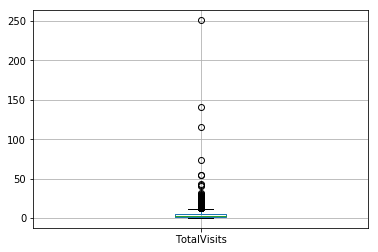

In [31]:
##Boxplot of fueltype vs price.
lead_df.boxplot('TotalVisits')

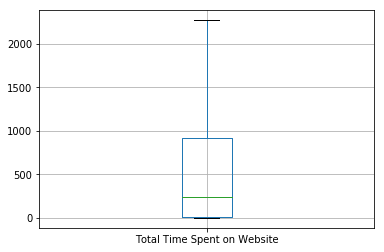

In [32]:
##Boxplot of fueltype vs price.
lead_df.boxplot('Total Time Spent on Website')

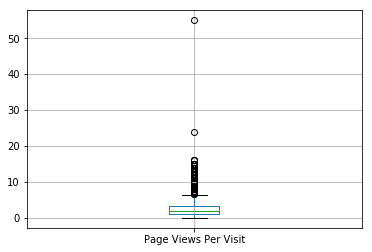

In [33]:
##Boxplot of fueltype vs price.
lead_df.boxplot('Page Views Per Visit')

In [34]:
#The following columns "Magazine,X Education Forums,Receive More Updates About Our Courses,Update me on Supply Chain Content,
#Get updates on DM Content,I agree to pay the amount through cheque" have  only value as "no" as there is no variance in these,
#dropping these columns.
lead_df.drop(['Magazine','Through Recommendations','Do Not Call','Search','Newspaper Article','Newspaper','Digital Advertisement','X Education Forums','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [35]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
A free copy of Mastering The Interview    9074 non-null object
Last Notable Activity                     9074 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 850.7+ KB


In [36]:
##Converting variables with yes and no to 1 and 0
##The columns fueltype, aspiration, doornumber, enginelocation
varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1,'No': 1})

# Applying the function on the df
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [37]:
##Now converting the Lead Source to factor.  
status = pd.get_dummies(lead_df['Lead Source'],prefix="Lead_Score_",drop_first = True)
lead_df = pd.concat([lead_df, status], axis = 1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,...,Lead_Score__Referral Sites,Lead_Score__Social Media,Lead_Score__WeLearn,Lead_Score__Welingak Website,Lead_Score__bing,Lead_Score__blog,Lead_Score__google,Lead_Score__testone,Lead_Score__welearnblog_Home,Lead_Score__youtubechannel
0,660737,API,Olark Chat,1,0,0.0,0,0.0,Page Visited on Website,1,...,0,0,0,0,0,0,0,0,0,0
1,660728,API,Organic Search,1,0,5.0,674,2.5,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,1,2.0,1532,2.0,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,1,0,1.0,305,1.0,Unreachable,1,...,0,0,0,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,1,2.0,1428,1.0,Converted to Lead,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
##Now converting the Last  Activity to factor.  
status = pd.get_dummies(lead_df['Last Activity'],prefix="last_activity_",drop_first = True)
lead_df = pd.concat([lead_df, status], axis = 1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,...,last_activity__Form Submitted on Website,last_activity__Had a Phone Conversation,last_activity__Olark Chat Conversation,last_activity__Page Visited on Website,last_activity__Resubscribed to emails,last_activity__SMS Sent,last_activity__Unreachable,last_activity__Unsubscribed,last_activity__View in browser link Clicked,last_activity__Visited Booth in Tradeshow
0,660737,API,Olark Chat,1,0,0.0,0,0.0,Page Visited on Website,1,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,1,0,5.0,674,2.5,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,1,2.0,1532,2.0,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,1,0,1.0,305,1.0,Unreachable,1,...,0,0,0,0,0,0,1,0,0,0
4,660681,Landing Page Submission,Google,1,1,2.0,1428,1.0,Converted to Lead,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
##Now converting the Last Notable Activity to factor.  
status = pd.get_dummies(lead_df['Last Notable Activity'],prefix="Last_notable_Activity_",drop_first = True)
lead_df = pd.concat([lead_df, status], axis = 1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,...,Last_notable_Activity__Form Submitted on Website,Last_notable_Activity__Had a Phone Conversation,Last_notable_Activity__Modified,Last_notable_Activity__Olark Chat Conversation,Last_notable_Activity__Page Visited on Website,Last_notable_Activity__Resubscribed to emails,Last_notable_Activity__SMS Sent,Last_notable_Activity__Unreachable,Last_notable_Activity__Unsubscribed,Last_notable_Activity__View in browser link Clicked
0,660737,API,Olark Chat,1,0,0.0,0,0.0,Page Visited on Website,1,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,1,0,5.0,674,2.5,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,1,2.0,1532,2.0,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,1,0,1.0,305,1.0,Unreachable,1,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,1,2.0,1428,1.0,Converted to Lead,1,...,0,0,1,0,0,0,0,0,0,0


In [40]:
##Dropping the the columns on which we created the factors. 
lead_df.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'],axis=1,inplace=True)

In [41]:
lead_df.columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Score__Direct Traffic',
       'Lead_Score__Facebook', 'Lead_Score__Google', 'Lead_Score__Live Chat',
       'Lead_Score__NC_EDM', 'Lead_Score__Olark Chat',
       'Lead_Score__Organic Search', 'Lead_Score__Pay per Click Ads',
       'Lead_Score__Press_Release', 'Lead_Score__Reference',
       'Lead_Score__Referral Sites', 'Lead_Score__Social Media',
       'Lead_Score__WeLearn', 'Lead_Score__Welingak Website',
       'Lead_Score__bing', 'Lead_Score__blog', 'Lead_Score__google',
       'Lead_Score__testone', 'Lead_Score__welearnblog_Home',
       'Lead_Score__youtubechannel', 'last_activity__Converted to Lead',
       'last_activity__Email Bounced', 'last_activity__Email Link Clicked',
       'last_activity__Email Marked Spam', 'last_activity__Email Opened',
       'last_activity__Email Received',
       '

In [42]:
# LEts check for outliers in the continuous variables in seperate dataframe to check first
num_lead_df = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [43]:
num_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 3 columns):
TotalVisits                    9074 non-null float64
Total Time Spent on Website    9074 non-null int64
Page Views Per Visit           9074 non-null float64
dtypes: float64(2), int64(1)
memory usage: 283.6 KB


In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


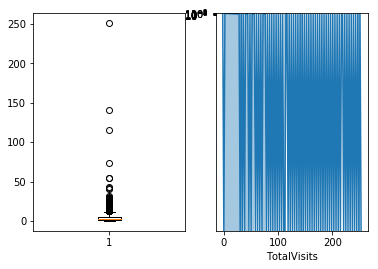

In [45]:
# simple density subplot
plt.subplot(1, 2, 1)
plt.boxplot(num_lead_df['TotalVisits'])


# log density subplot
plt.subplot(1, 2, 2)
sns.distplot(num_lead_df['TotalVisits'])
plt.yscale('log')
plt.show()

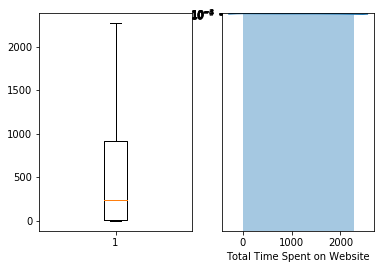

In [46]:
# simple density subplot
plt.subplot(1, 2, 1)
plt.boxplot(num_lead_df['Total Time Spent on Website'])


# log density subplot
plt.subplot(1, 2, 2)
sns.distplot(num_lead_df['Total Time Spent on Website'])
plt.yscale('log')
plt.show()

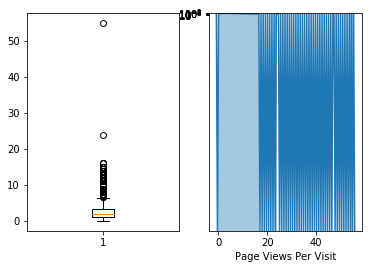

In [47]:
# simple density subplot
plt.subplot(1, 2, 1)
plt.boxplot(num_lead_df['Page Views Per Visit'])


# log density subplot
plt.subplot(1, 2, 2)
sns.distplot(num_lead_df['Page Views Per Visit'])
plt.yscale('log')
plt.show()

In [48]:
num_lead_df.shape

(9074, 3)

In [49]:
num_lead_df_out = num_lead_df[num_lead_df['TotalVisits'] < num_lead_df['TotalVisits'].quantile(0.95)]

In [50]:
num_lead_df_out.shape

(8607, 3)

In [51]:
num_lead_df_out2 = num_lead_df_out[num_lead_df_out['Page Views Per Visit'] < num_lead_df_out['Page Views Per Visit'].quantile(0.95)]

In [52]:
num_lead_df_out2.shape

(8124, 3)

In [53]:
num_lead_df_out2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 9239
Data columns (total 3 columns):
TotalVisits                    8124 non-null float64
Total Time Spent on Website    8124 non-null int64
Page Views Per Visit           8124 non-null float64
dtypes: float64(2), int64(1)
memory usage: 253.9 KB


In [54]:
num_lead_df_out2.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8124.000000,8124.000000,8124.000000
mean,2.581118,460.237198,1.944542
std,2.174566,539.219974,1.527698
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,223.500000,2.000000
75%,4.000000,870.000000,3.000000
max,9.000000,2272.000000,5.000000


In [55]:
lead_df.shape

(9074, 58)

As we can see removing the outliers from two TotalVisits and Page Views Per Visit gives much batter distribution, we would now remove outliers from original dataframe

In [56]:
lead_df_2 = lead_df[lead_df['TotalVisits'] < lead_df['TotalVisits'].quantile(0.95)]

In [57]:
lead_df_2.shape

(8607, 58)

In [58]:
lead_df_3 = lead_df_2[lead_df_2['Page Views Per Visit'] < lead_df_2['Page Views Per Visit'].quantile(0.95)]

In [59]:
lead_df_3.shape

(8124, 58)

In [60]:
# Normalising continuous features
df = lead_df_3[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [61]:
normalized_df=(df-df.mean())/df.std()
lead_df_4 = lead_df_3.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
lead_df_4 = pd.concat([lead_df_4,normalized_df],axis=1)
lead_df_4.head()

,Lead Number,Do Not Email,Converted,A free copy of Mastering The Interview,Lead_Score__Direct Traffic,Lead_Score__Facebook,Lead_Score__Google,Lead_Score__Live Chat,Lead_Score__NC_EDM,Lead_Score__Olark Chat,...,Last_notable_Activity__Olark Chat Conversation,Last_notable_Activity__Page Visited on Website,Last_notable_Activity__Resubscribed to emails,Last_notable_Activity__SMS Sent,Last_notable_Activity__Unreachable,Last_notable_Activity__Unsubscribed,Last_notable_Activity__View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-1.186957,-0.853524,-1.272858
1,660728,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.112352,0.396430,0.363592
2,660727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.267234,1.987617,0.036302
3,660719,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.727096,-0.287892,-0.618278
4,660681,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.267234,1.794746,-0.618278


In [62]:
lead_df_4.shape

(8124, 58)

In [63]:
### Model Building

In [64]:
##Building the Model
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_df_4.drop(['Converted','Lead Number'],axis=1)

# Putting response variable to y
y = lead_df_4['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [66]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

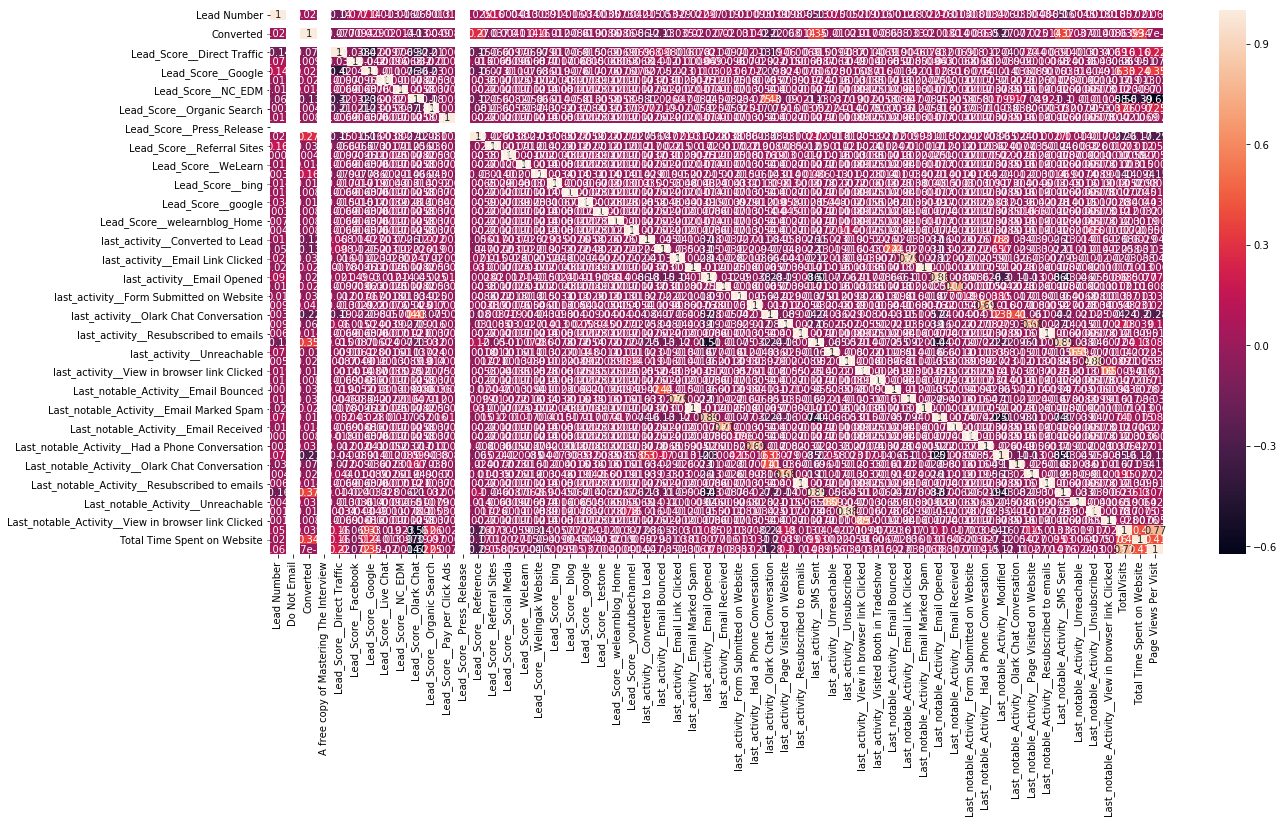

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df_4.corr(),annot = True)

In [68]:
#Dropping highly correlated dummy variables
X_test = X_test.drop(['Lead_Score__Direct Traffic','Lead_Score__Olark Chat','last_activity__Olark Chat Conversation','last_activity__Form Submitted on Website','last_activity__Had a Phone Conversation'], 1)
X_train = X_train.drop(['Lead_Score__Direct Traffic','Lead_Score__Olark Chat','last_activity__Olark Chat Conversation','last_activity__Form Submitted on Website','last_activity__Had a Phone Conversation'], 1)

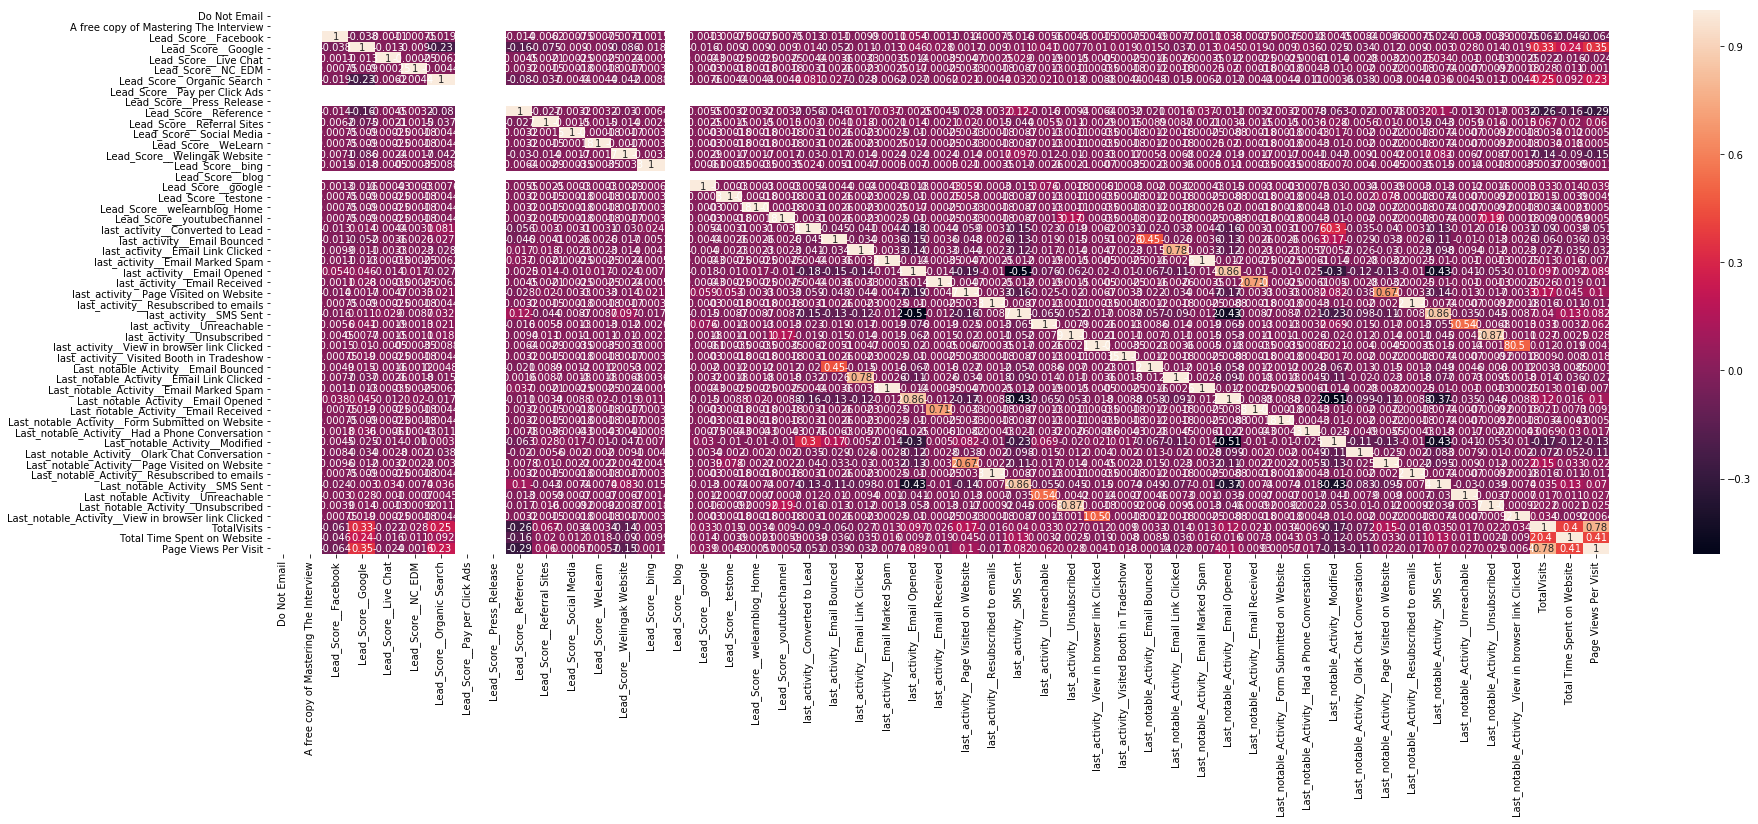

In [69]:
plt.figure(figsize = (30,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [70]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5641
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Sun, 03 Mar 2019   Deviance:                       5029.6
Time:                        20:08:20   Pearson chi2:                 5.73e+03
No. Iterations:                    22                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Do Not Email                                           11.1420   3.97e+04      0.000      1.000   -7.79e+04    7.79e+04
A free copy of Mastering The Interview                 11.1420   3.97e+04      0.000      1.000   -7.79e+04    7.79e+04
Lead_Score__Facebook                                    0.8855      0.496      1.787      0.074      -0.086       1.857
Lead_Score__Google                                      0.0932      0.085      1.100      0.271      -0.073       0.259
Lead_Score__Live Chat                                  23.4895   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead_Score__NC_EDM                                     23.0990   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead_Score__Organic Search                              0.0273      0.128      0.213      0.832      -0.224       0.279
Lead_Score__Pay per Click Ads                       -4.169e-09   1.45e-05     -0.000      1.000   -2.84e-05    2.84e-05
Lead_Score__Press_Release                           -2.774e-09   9.81e-06     -0.000      1.000   -1.92e-05    1.92e-05
Lead_Score__Reference                                   3.8833      0.264     14.690      0.000       3.365       4.401
Lead_Score__Referral Sites                             -0.3120      0.335     -0.932      0.352      -0.968       0.344
Lead_Score__Social Media                               24.8671   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead_Score__WeLearn                                    23.1581   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead_Score__Welingak Website                            4.6570      0.726      6.415      0.000       3.234       6.080
Lead_Score__bing                                      -21.7039   3.91e+04     -0.001      1.000   -7.66e+04    7.65e+04
Lead_Score__blog                                    -5.237e-09   9.42e-06     -0.001      1.000   -1.85e-05    1.85e-05
Lead_Score__google                                    -21.8536   4.26e+04     -0.001      1.000   -8.35e+04    8.34e+04
Lead_Score__testone                                   -21.9006   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead_Score__welearnblog_Home                          -22.4580   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead_Score__youtubechannel                            -22.8482   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
last_activity__Converted to Lead                       -0.2132      0.241     -0.885      0.376      -0.685       0.259
last_activity__Email Bounced                           -1.8037      0.539     -3.345      0.001      -2.861      -0.747
last_activity__Email Link Clicked                       0.7395      0.366      2.022      0.043       0.023       1.456
last_activity__Email Marked Spam          

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 18),
 ('A free copy of Mastering The Interview', False, 13),
 ('Lead_Score__Facebook', True, 1),
 ('Lead_Score__Google', False, 30),
 ('Lead_Score__Live Chat', True, 1),
 ('Lead_Score__NC_EDM', False, 9),
 ('Lead_Score__Organic Search', False, 34),
 ('Lead_Score__Pay per Click Ads', False, 37),
 ('Lead_Score__Press_Release', False, 36),
 ('Lead_Score__Reference', True, 1),
 ('Lead_Score__Referral Sites', False, 15),
 ('Lead_Score__Social Media', False, 2),
 ('Lead_Score__WeLearn', False, 16),
 ('Lead_Score__Welingak Website', True, 1),
 ('Lead_Score__bing', False, 8),
 ('Lead_Score__blog', False, 35),
 ('Lead_Score__google', False, 7),
 ('Lead_Score__testone', False, 28),
 ('Lead_Score__welearnblog_Home', False, 21),
 ('Lead_Score__youtubechannel', False, 20),
 ('last_activity__Converted to Lead', False, 11),
 ('last_activity__Email Bounced', True, 1),
 ('last_activity__Email Link Clicked', False, 6),
 ('last_activity__Email Marked Spam', False, 26),
 ('last_ac

In [75]:
col = X_train.columns[rfe.support_]

In [76]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'A free copy of Mastering The Interview',
       'Lead_Score__Google', 'Lead_Score__NC_EDM',
       'Lead_Score__Organic Search', 'Lead_Score__Pay per Click Ads',
       'Lead_Score__Press_Release', 'Lead_Score__Referral Sites',
       'Lead_Score__Social Media', 'Lead_Score__WeLearn', 'Lead_Score__bing',
       'Lead_Score__blog', 'Lead_Score__google', 'Lead_Score__testone',
       'Lead_Score__welearnblog_Home', 'Lead_Score__youtubechannel',
       'last_activity__Converted to Lead', 'last_activity__Email Link Clicked',
       'last_activity__Email Marked Spam',
       'last_activity__Page Visited on Website', 'last_activity__Unreachable',
       'last_activity__Unsubscribed',
       'last_activity__View in browser link Clicked',
       'last_activity__Visited Booth in Tradeshow',
       'Last_notable_Activity__Email Bounced',
       'Last_notable_Activity__Email Link Clicked',
       'Last_notable_Activity__Email Marked Spam',
       'Last_notable_Activity__Em

In [77]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5670
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2568.1
Date:                Sun, 03 Mar 2019   Deviance:                       5136.2
Time:                        20:08:21   Pearson chi2:                 5.70e+03
No. Iterations:                    20                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.9572      0.109     -8.758      0.000      -1.171      -0.743
Lead_Score__Facebook                                1.1426      0.499      2.289      0.022       0.164       2.121
Lead_Score__Live Chat                              21.9019   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Lead_Score__Reference                               4.2083      0.260     16.194      0.000       3.699       4.718
Lead_Score__Welingak Website                        4.9411      0.724      6.829      0.000       3.523       6.359
last_activity__Email Bounced                       -1.2252      0.334     -3.673      0.000      -1.879      -0.571
last_activity__Email Opened                         0.9979      0.154      6.461      0.000       0.695       1.301
last_activity__Email Received                      22.1896   2.06e+04      0.001      0.999   -4.04e+04    4.04e+04
last_activity__Resubscribed to emails              23.3039   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
last_activity__SMS Sent                             1.4020      0.112     12.521      0.000       1.183       1.621
Last_notable_Activity__Email Opened                -0.9214      0.177     -5.197      0.000      -1.269      -0.574
Last_notable_Activity__Had a Phone Conversation     1.9418      1.149      1.689      0.091      -0.311       4.195
Last_notable_Activity__Modified                    -1.1740      0.109    -10.726      0.000      -1.389      -0.960
Last_notable_Activity__Olark Chat Conversation     -1.1692      0.335     -3.491      0.000      -1.826      -0.513
Last_notable_Activity__Unreachable                  1.7246      0.588      2.935      0.003       0.573       2.876
Total Time Spent on Website                         0.9146      0.035     25.903      0.000       0.845       0.984
===================================================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3994    0.217222
897     0.249747
4030    0.922132
4530    0.170803
1452    0.248162
1992    0.180392
6401    0.217285
4901    0.698365
3675    0.128279
5939    0.051571
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21722197, 0.24974722, 0.92213181, 0.17080292, 0.24816161,
       0.18039169, 0.21728452, 0.69836508, 0.12827943, 0.05157095])

In [80]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.217222,3994
1,0,0.249747,897
2,1,0.922132,4030
3,0,0.170803,4530
4,0,0.248162,1452


In [81]:
#Creating new column'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
#y_train_pred_final['Lead_score_pred'] = y_train_pred_final.Converted_Prob.map(lambda x: x*100)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.217222,3994,0
1,0,0.249747,897,0
2,1,0.922132,4030,1
3,0,0.170803,4530,0
4,0,0.248162,1452,0


In [82]:
from sklearn import metrics

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3062  462]
 [ 804 1358]]


In [84]:
#Predicted     not_converted    converted
#Actual
#not_converted        3062      462
#converted            804       1358  

In [85]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7773478719662329


# Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

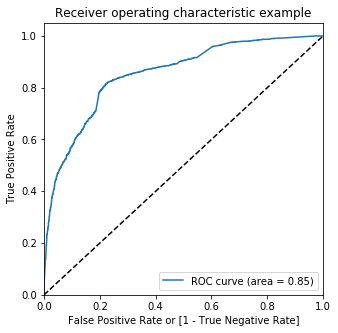

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [89]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.217222,3994,0,1,1,1,0,0,0,0,0,0,0
1,0,0.249747,897,0,1,1,1,0,0,0,0,0,0,0
2,1,0.922132,4030,1,1,1,1,1,1,1,1,1,1,1
3,0,0.170803,4530,0,1,1,0,0,0,0,0,0,0,0
4,0,0.248162,1452,0,1,1,1,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380232  1.000000  0.000000
0.1   0.1  0.568590  0.976411  0.318388
0.2   0.2  0.692930  0.881591  0.577185
0.3   0.3  0.783152  0.827012  0.756243
0.4   0.4  0.794056  0.783996  0.800227
0.5   0.5  0.777348  0.628122  0.868899
0.6   0.6  0.772423  0.531915  0.919977
0.7   0.7  0.764509  0.452359  0.956016
0.8   0.8  0.737249  0.350601  0.974461
0.9   0.9  0.698558  0.222942  0.990352


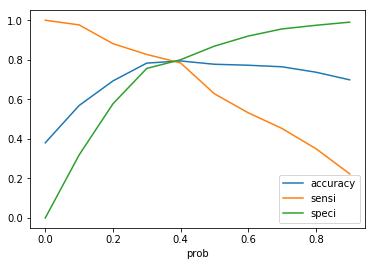

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final['Lead_score_pred'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score_pred
0,0,0.217222,3994,0,1,1,1,0,0,0,0,0,0,0,0,22
1,0,0.249747,897,0,1,1,1,0,0,0,0,0,0,0,0,25
2,1,0.922132,4030,1,1,1,1,1,1,1,1,1,1,1,1,92
3,0,0.170803,4530,0,1,1,0,0,0,0,0,0,0,0,0,17
4,0,0.248162,1452,0,1,1,1,0,0,0,0,0,0,0,0,25


In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7940555750967289

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2820,  704],
       [ 467, 1695]])

In [95]:
#Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7065443934972906

In [96]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6281221091581869

In [97]:
from sklearn.metrics import precision_score, recall_score

In [98]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7065443934972906

In [99]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7839962997224792

In [100]:
### Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

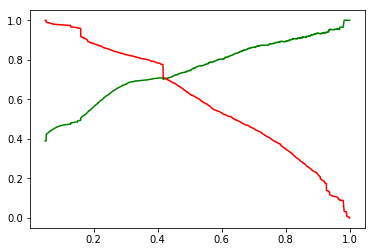

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [102]:
X_test = X_test[col]
X_test.head()

,Lead_Score__Facebook,Lead_Score__Live Chat,Lead_Score__Reference,Lead_Score__Welingak Website,last_activity__Email Bounced,last_activity__Email Opened,last_activity__Email Received,last_activity__Resubscribed to emails,last_activity__SMS Sent,Last_notable_Activity__Email Opened,Last_notable_Activity__Had a Phone Conversation,Last_notable_Activity__Modified,Last_notable_Activity__Olark Chat Conversation,Last_notable_Activity__Unreachable,Total Time Spent on Website
3117,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.853524
5735,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.477054
3135,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.260074
1663,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.853524
3386,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.263783


In [103]:
X_test_sm = sm.add_constant(X_test)

In [104]:
y_test_pred = res.predict(X_test_sm)

In [105]:
y_test_pred[:10]

3117    0.051571
5735    0.071256
3135    0.246268
1663    0.968664
3386    0.245639
3936    0.599756
4729    0.196180
2213    0.219710
3167    0.294343
4668    0.233304
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [107]:
# Let's see the head
y_pred_1.head()

,0
3117,0.051571
5735,0.071256
3135,0.246268
1663,0.968664
3386,0.245639


In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [109]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [112]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3117,0.051571
1,0,5735,0.071256
2,0,3135,0.246268
3,1,1663,0.968664
4,0,3386,0.245639


In [113]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [114]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Converted_Prob'], axis=1)

In [115]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,3117,0,0.051571
1,5735,0,0.071256
2,3135,0,0.246268
3,1663,1,0.968664
4,3386,0,0.245639


In [116]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [117]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,3117,0,0.051571,0
1,5735,0,0.071256,0
2,3135,0,0.246268,0
3,1663,1,0.968664,1
4,3386,0,0.245639,0


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7945036915504512

In [119]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1230,  327],
       [ 174,  707]])

In [120]:
#Predicted     not_converted    converted
#Actual
#not_converted        1230       327
#converted            174       707  

In [121]:
##Answer to question 3
y_pres_more_calls=y_pred_final.drop('final_predicted',axis=1)
y_pres_more_calls.head()

,LeadID,Converted,Converted_Prob
0,3117,0,0.051571
1,5735,0,0.071256
2,3135,0,0.246268
3,1663,1,0.968664
4,3386,0,0.245639


In [122]:
y_pres_more_calls['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [123]:
confusion3 = metrics.confusion_matrix(y_pres_more_calls.Converted, y_pres_more_calls.final_predicted )
confusion3

array([[876, 681],
       [104, 777]])

In [124]:
#Predicted     not_converted    converted
#Actual
#not_converted        876       681
#converted            104       777  

In [125]:
##Answer to question 4
y_pres_less_calls=y_pred_final.drop('final_predicted',axis=1)
y_pres_less_calls.head()

,LeadID,Converted,Converted_Prob
0,3117,0,0.051571
1,5735,0,0.071256
2,3135,0,0.246268
3,1663,1,0.968664
4,3386,0,0.245639


In [126]:
y_pres_less_calls['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

In [127]:
confusion4 = metrics.confusion_matrix(y_pres_less_calls.Converted, y_pres_less_calls.final_predicted )
confusion4

array([[1505,   52],
       [ 579,  302]])

In [128]:
#Predicted     not_converted    converted
#Actual
#not_converted        1505       52
#converted            579       302  